In [1]:
#helpers
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

tpath = os.path.dirname(os.path.realpath("__file__"))
VIZ_DIR=tpath

tpath = os.path.abspath(os.path.join(tpath, "../"))
ROOT_DIR=tpath

sys.path.append(tpath)

from common import *

In [3]:
# functions for plotting
def plot_singleword(WORDS,embeddings):
    for word1 in WORDS:
        clear_figure()
        time_sims, lookups, nearests, sims = get_time_sims(embeddings, word1)

        words = list(lookups.keys())
        values = [ lookups[word] for word in words ]
        fitted = fit_tsne(values)
        if not len(fitted):
            print("Couldn't model word", word1)
            continue

        # draw the words onto the graph
        cmap = get_cmap(len(time_sims))
        annotations = plot_words(word1, words, fitted, cmap, sims)

        if annotations:
            plot_annotations(annotations)
        
        savefig("%s_annotated" % word1)
        plt.show()
        for year, sim in time_sims.items():
            print(year, sim)
def plot_wordchain(WORDS,embeddings):
    all_lookups = {}
    all_sims = {}
    WORDS.sort()
    wordchain = "_".join(WORDS)

    clear_figure()
    for word1 in WORDS:
        time_sims, lookups, nearests, sims = get_time_sims(embeddings, word1)

        all_lookups.update(lookups)
        all_sims.update(sims)




    words = list(all_lookups.keys())
    values = [ all_lookups[word] for word in words ]
    fitted = fit_tsne(values)

    # draw the words onto the graph
    cmap = get_cmap(len(time_sims))

    # TODO: split the annotations up
    annotations = plot_words(WORDS, words, fitted, cmap, all_sims)
    if annotations:
        plot_annotations(annotations)

    savefig("%s_chain.png" % wordchain)
    plt.show()
def plot_shaded(WORDS,embeddings):
    for word1 in WORDS:
        time_sims, lookups, nearests, sims = get_time_sims(embeddings, word1)

        clear_figure()

        # we remove word1 from our words because we just want to plot the different
        # related words
        words = list(filter(lambda word: word.split("|")[0] != word1, lookups.keys()))

        values = [ lookups[word] for word in words ]
        fitted = fit_tsne(values)
        if not len(fitted):
            print("Couldn't model word", word1)
            continue

        cmap = get_cmap(len(time_sims))
        annotations = plot_words(word1, words, fitted, cmap, sims)
        savefig("%s_shaded_1" % word1)
        plt.show()
        for year, sim in time_sims.items():
            print(year, sim)

# input

In [4]:
# input the words you want track as a list.
WORDS = ['china','car','dogs']
# input the embedding file name. Note: for word2vec format embedding(NYTw2v), it would take a long time to load each year. Please be
# patient. The fastest way is use format of hist(COHA), you could choose to transfer all other formats to this.

#embeddings = load_embeddings("../../../../../data/Dataset/NYTw2v",start_year=1987,end_year= 2004,step = 5)
embeddings = load_embeddings("../../../../../data/Dataset/COHA/sgns/",start_year=1840,end_year= 2000,step = 10)


LOADING EMBEDDINGS ../../data/Dataset/NYTw2v
THIS MIGHT TAKE A WHILE...
path
path
path
path
LOAD EMBEDDINGS TOOK 172.88889288902283


# choose figure type

the most useful figure is the first one, which tracks the similar words around single target word across years with arrows. The output has been saved in "output". Please check your local directory.

GET TIME SIMS FOR china TOOK 0.15961766242980957
FIT TSNE TOOK 0.7072896957397461
[60.972538 -9.157981] [14.242331 50.43003 ]
[14.242331 50.43003 ] [ -9.171636 -50.63236 ]
[ -9.171636 -50.63236 ] [-64.10743    5.218937]


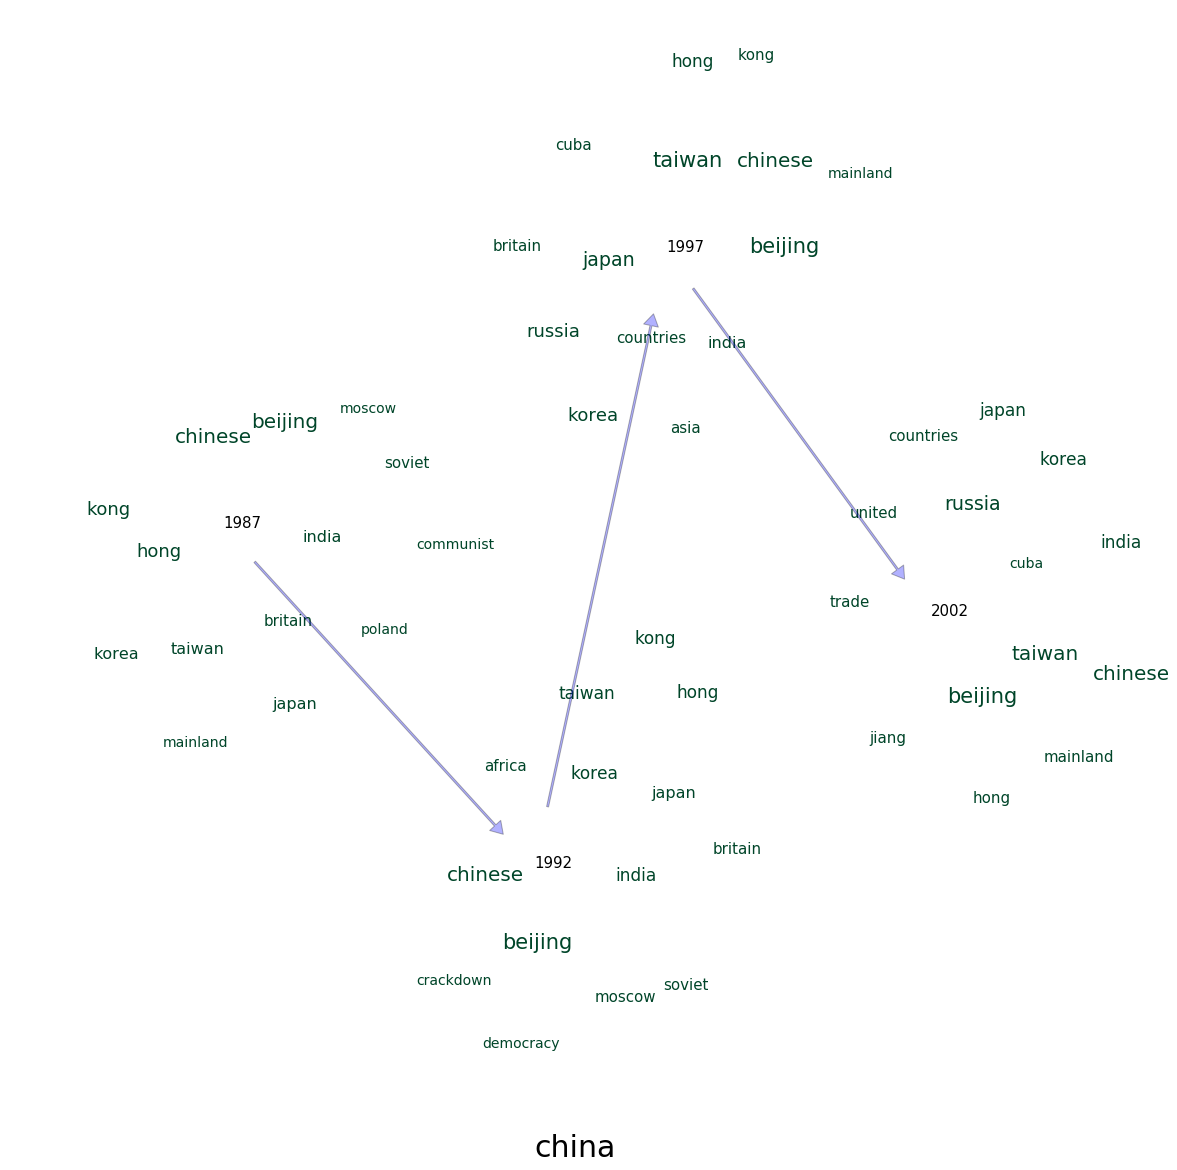

1987 [(1.0000002, 'china|1987'), (0.6982219, 'chinese|1987'), (0.684113, 'beijing|1987'), (0.6237477, 'hong|1987'), (0.6056855, 'kong|1987'), (0.5662776, 'taiwan|1987'), (0.56154287, 'india|1987'), (0.5572766, 'japan|1987'), (0.5348629, 'korea|1987'), (0.52628225, 'britain|1987'), (0.5203584, 'soviet|1987'), (0.49055845, 'moscow|1987'), (0.48839486, 'poland|1987'), (0.48116726, 'communist|1987'), (0.47066587, 'mainland|1987')]
1992 [(1.0, 'china|1992'), (0.7192366, 'beijing|1992'), (0.6936481, 'chinese|1992'), (0.5920393, 'hong|1992'), (0.5792199, 'taiwan|1992'), (0.5746963, 'kong|1992'), (0.57435393, 'india|1992'), (0.57144606, 'korea|1992'), (0.56307757, 'japan|1992'), (0.5161898, 'soviet|1992'), (0.51037717, 'britain|1992'), (0.5063559, 'moscow|1992'), (0.5062851, 'africa|1992'), (0.48746595, 'democracy|1992'), (0.47947037, 'crackdown|1992')]
1997 [(1.0, 'china|1997'), (0.7259101, 'beijing|1997'), (0.70263207, 'taiwan|1997'), (0.6783807, 'chinese|1997'), (0.6539191, 'japan|1997'), (

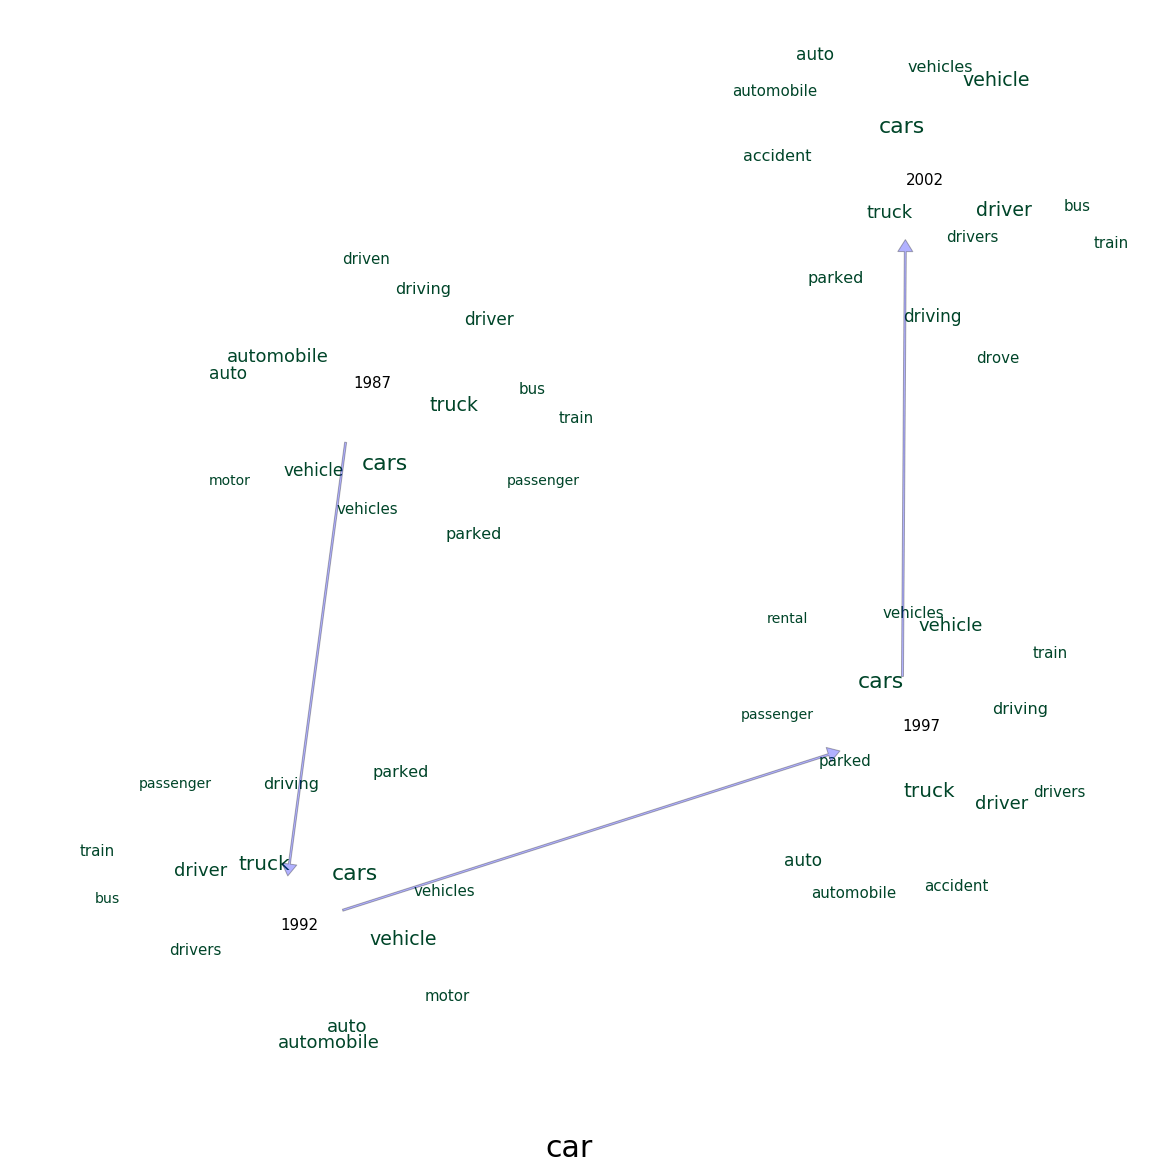

1987 [(0.99999994, 'car|1987'), (0.73690444, 'cars|1987'), (0.6635898, 'truck|1987'), (0.60551375, 'automobile|1987'), (0.592885, 'auto|1987'), (0.59102947, 'vehicle|1987'), (0.5705507, 'driver|1987'), (0.5574213, 'parked|1987'), (0.5406123, 'driving|1987'), (0.52992386, 'train|1987'), (0.5235019, 'bus|1987'), (0.51440644, 'vehicles|1987'), (0.50301445, 'driven|1987'), (0.4985227, 'passenger|1987'), (0.48758054, 'motor|1987')]
1992 [(1.0000002, 'car|1992'), (0.7573762, 'cars|1992'), (0.69668305, 'truck|1992'), (0.64779234, 'vehicle|1992'), (0.6240485, 'auto|1992'), (0.6131027, 'automobile|1992'), (0.6055436, 'driver|1992'), (0.53682137, 'parked|1992'), (0.53347874, 'driving|1992'), (0.529963, 'vehicles|1992'), (0.514819, 'train|1992'), (0.5066197, 'drivers|1992'), (0.5023579, 'motor|1992'), (0.48788688, 'passenger|1992'), (0.4848603, 'bus|1992')]
1997 [(0.99999994, 'car|1997'), (0.74974823, 'cars|1997'), (0.6983497, 'truck|1997'), (0.6132151, 'driver|1997'), (0.6045386, 'vehicle|1997')

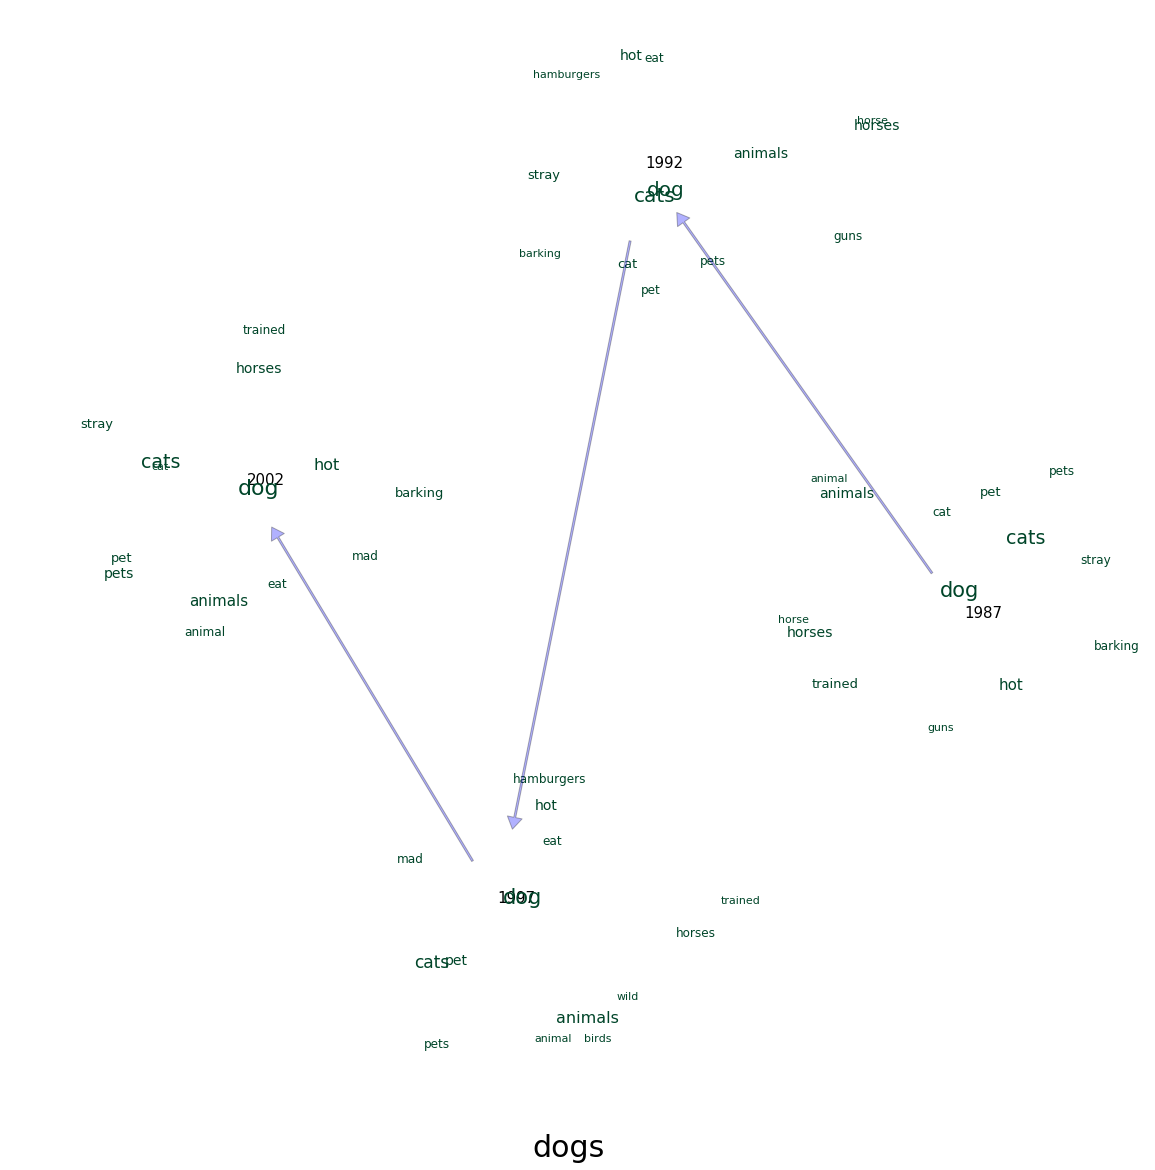

1987 [(1.0, 'dogs|1987'), (0.7106061, 'dog|1987'), (0.655856, 'cats|1987'), (0.5118863, 'hot|1987'), (0.49701765, 'horses|1987'), (0.48606402, 'animals|1987'), (0.46194962, 'pet|1987'), (0.44011787, 'trained|1987'), (0.4227694, 'barking|1987'), (0.41708544, 'stray|1987'), (0.41417798, 'pets|1987'), (0.40895766, 'cat|1987'), (0.39941248, 'horse|1987'), (0.39702576, 'guns|1987'), (0.39239922, 'animal|1987')]
1992 [(1.0000001, 'dogs|1992'), (0.69535553, 'dog|1992'), (0.68410826, 'cats|1992'), (0.49006873, 'horses|1992'), (0.48711038, 'animals|1992'), (0.4830365, 'hot|1992'), (0.45766702, 'stray|1992'), (0.44824874, 'cat|1992'), (0.43234113, 'pets|1992'), (0.4230293, 'eat|1992'), (0.41217124, 'pet|1992'), (0.40395638, 'guns|1992'), (0.3984533, 'hamburgers|1992'), (0.39488003, 'barking|1992'), (0.37196285, 'horse|1992')]
1997 [(0.99999994, 'dogs|1997'), (0.71175414, 'dog|1997'), (0.5719518, 'cats|1997'), (0.53534704, 'animals|1997'), (0.48048413, 'pet|1997'), (0.4786344, 'hot|1997'), (0.431

In [5]:
plot_singleword(WORDS,embeddings)

GET TIME SIMS FOR car TOOK 1.594128131866455
GET TIME SIMS FOR dogs TOOK 0.8695781230926514
FIT TSNE TOOK 8.986814022064209
[22.374842  -2.0765529] [-18.716671   -1.1836866]
[-18.716671   -1.1836866] [22.00203   -2.3154297]
[22.00203   -2.3154297] [-18.02667    -2.3478138]
[-18.02667    -2.3478138] [22.011984  -3.0071354]
[22.011984  -3.0071354] [-16.867441   -3.0857327]
[-16.867441   -3.0857327] [22.763773 -3.107908]
[22.763773 -3.107908] [-16.578379   -3.0856607]
[-16.578379   -3.0856607] [22.378286  -3.4522436]
[22.378286  -3.4522436] [-15.337997   -3.2321417]
[-15.337997   -3.2321417] [22.781046  -4.0339046]
[22.781046  -4.0339046] [-14.578248  -3.003761]
[-14.578248  -3.003761] [22.132738 -4.47347 ]
[22.132738 -4.47347 ] [-14.1736765  -3.8089683]
[-14.1736765  -3.8089683] [22.06672   -5.4759254]
[22.06672   -5.4759254] [-13.903345  -3.972189]
[-13.903345  -3.972189] [21.893045  -6.2809916]
[21.893045  -6.2809916] [-14.028899  -8.360211]
[-14.028899  -8.360211] [20.706272  -7.36421

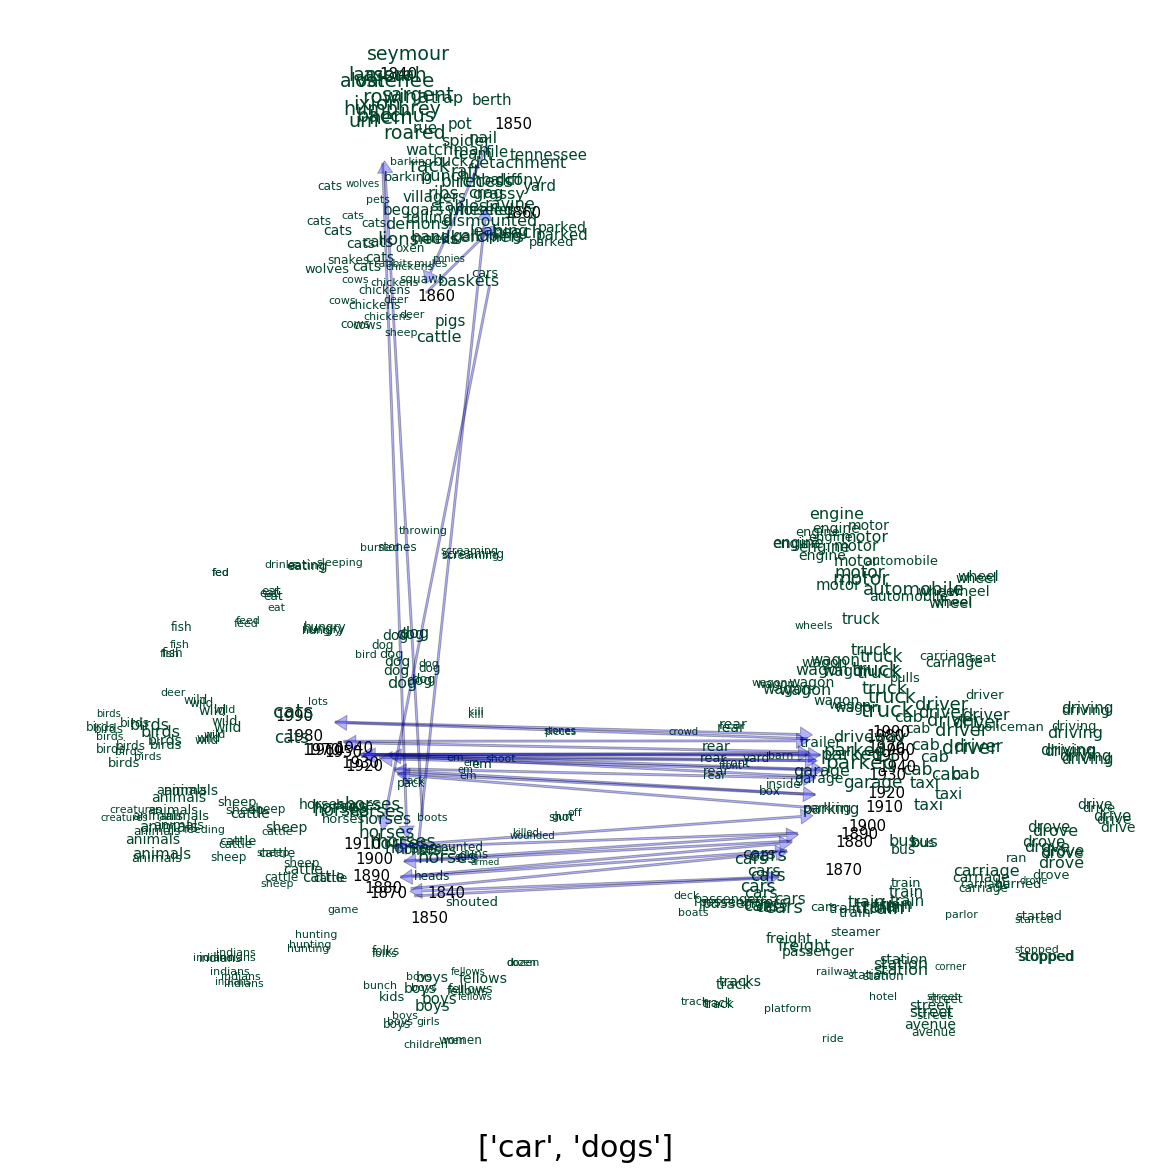

In [6]:
plot_wordchain(WORDS,embeddings)

GET TIME SIMS FOR car TOOK 0.9854259490966797
FIT TSNE TOOK 3.5770199298858643


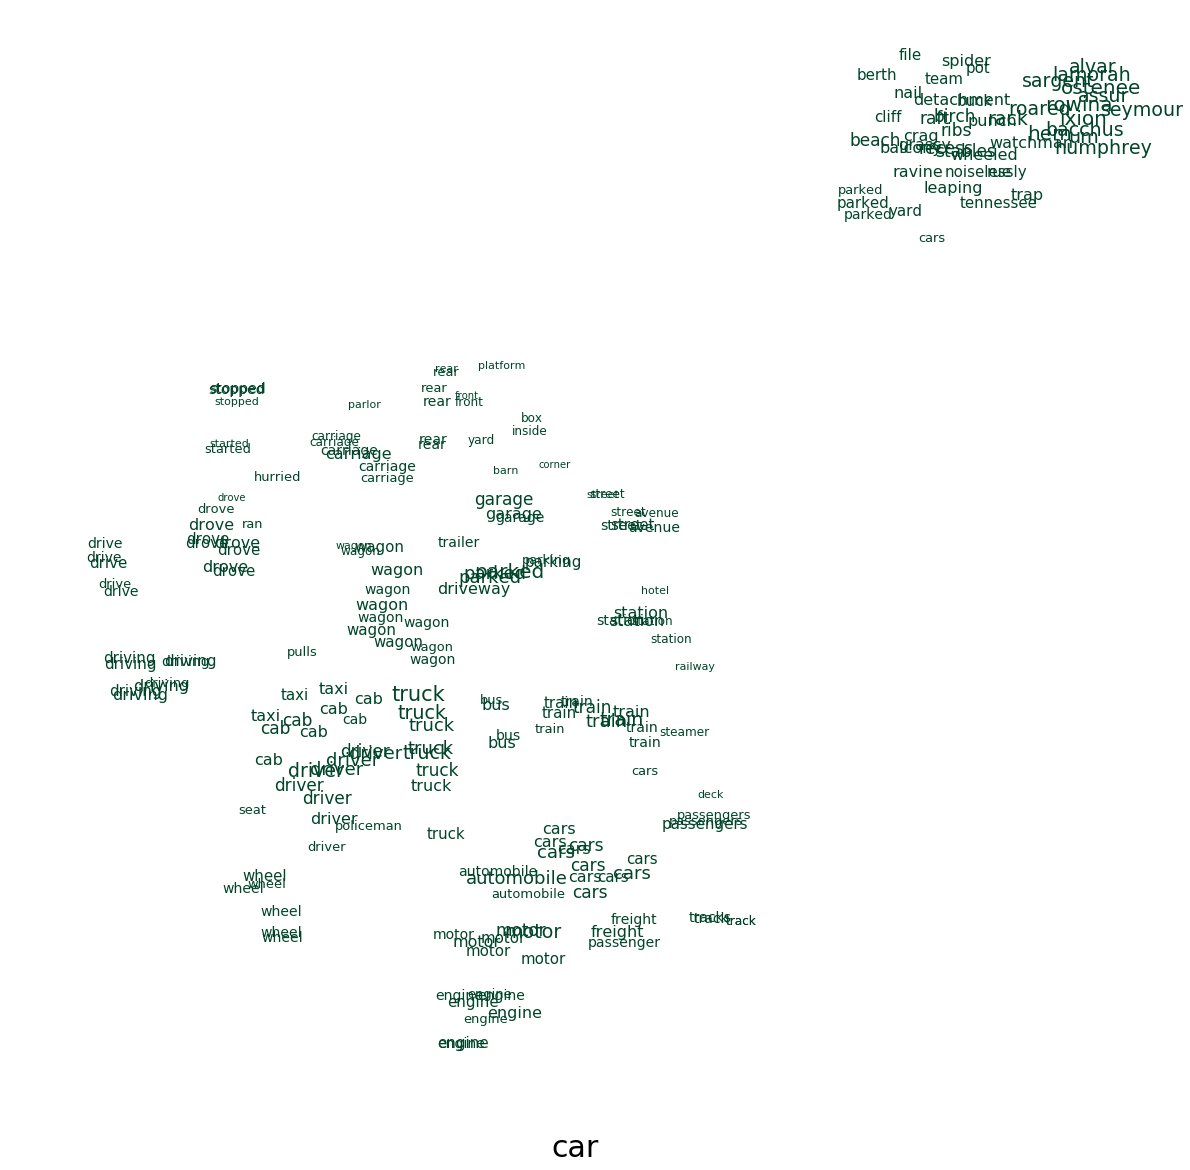

1840 [(1.0, 'car|1840'), (0.6758701292613887, 'ixion|1840'), (0.6753904728239359, 'hem|1840'), (0.6729832181407167, 'ostenee|1840'), (0.6679201184430874, 'rowina|1840'), (0.6585833028543723, 'sargent|1840'), (0.6552389787523667, 'rack|1840'), (0.6499954226578912, 'alvar|1840'), (0.6490225700559047, 'seymour|1840'), (0.6463308854307046, 'roared|1840'), (0.6457352190787244, 'lamorah|1840'), (0.6441119576874785, 'assur|1840'), (0.6415528875473178, 'bacchus|1840'), (0.6372975583924217, 'humphrey|1840'), (0.6368552932640457, 'um|1840')]
1850 [(1.0000000000000002, 'car|1850'), (0.5623428014230414, 'watchman|1850'), (0.540936752678278, 'balcony|1850'), (0.5383251724887991, 'spider|1850'), (0.5362129686234891, 'ravine|1850'), (0.5313529160432333, 'file|1850'), (0.530803593900399, 'yard|1850'), (0.526528303262833, 'rue|1850'), (0.5260546189475881, 'buck|1850'), (0.5219075211309573, 'berth|1850'), (0.521541236913364, 'pot|1850'), (0.5208307330257042, 'noiselessly|1850'), (0.5206247095592088, 'cl

GET TIME SIMS FOR dogs TOOK 0.9130990505218506
FIT TSNE TOOK 3.643010139465332


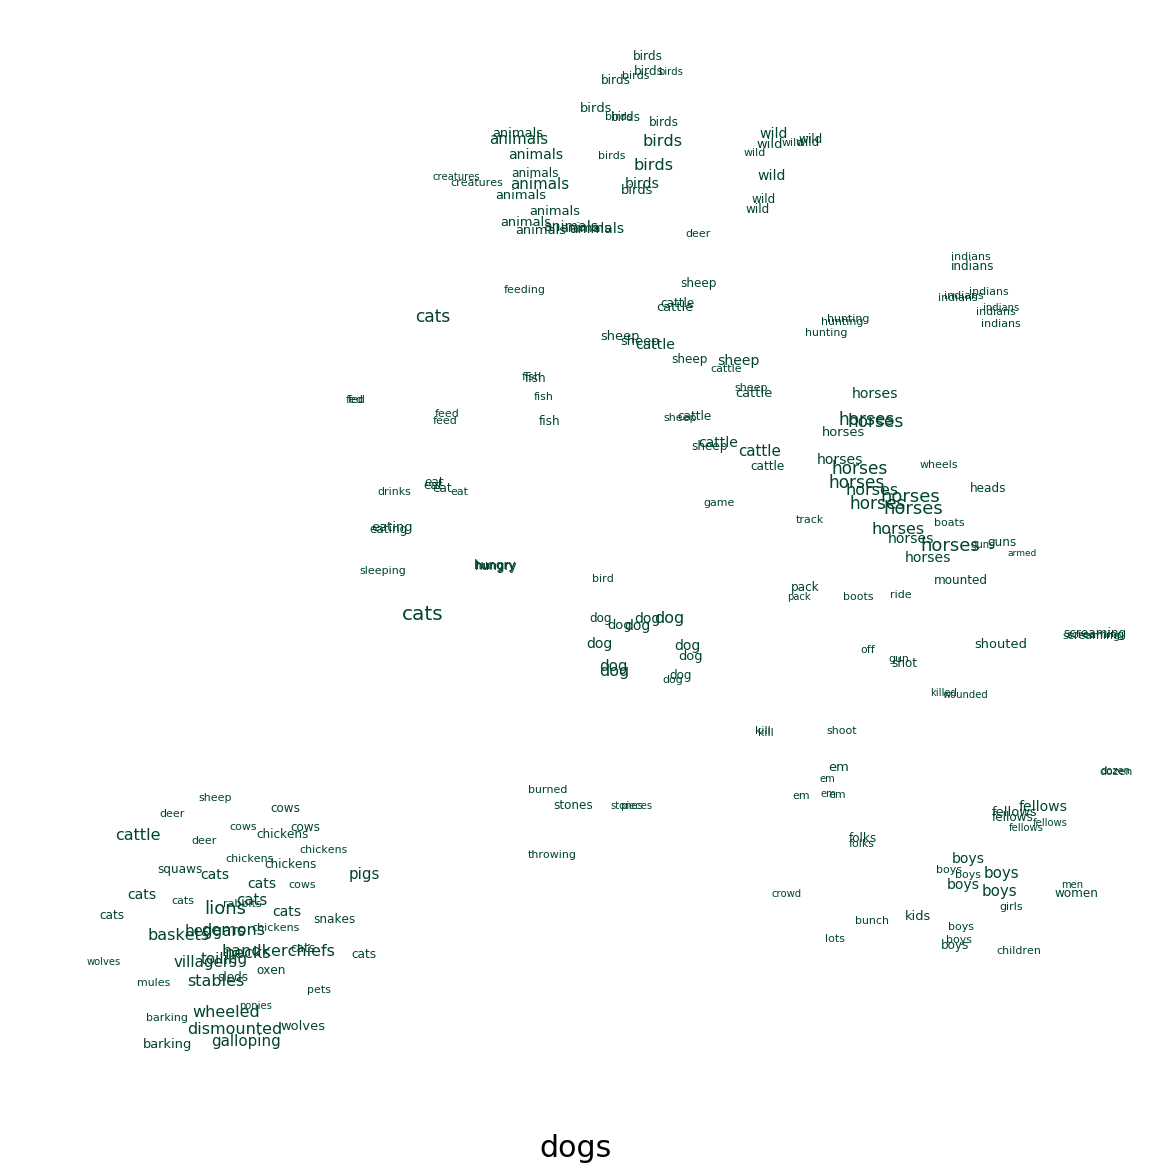

1840 [(1.0000000000000002, 'dogs|1840'), (0.6153718629515128, 'horses|1840'), (0.5090341369329603, 'boys|1840'), (0.4994847117643973, 'fellows|1840'), (0.4474664364500842, 'em|1840'), (0.43422269059175495, 'shouted|1840'), (0.42503887593725836, 'shot|1840'), (0.4181759123149503, 'mounted|1840'), (0.4144135030807842, 'heads|1840'), (0.39781975946434106, 'ride|1840'), (0.39644050995353053, 'kill|1840'), (0.395458804529806, 'gun|1840'), (0.3926558434692501, 'shoot|1840'), (0.3912464978179705, 'dozen|1840'), (0.38665542050653945, 'off|1840')]
1850 [(0.9999999999999998, 'dogs|1850'), (0.5102810798046011, 'boys|1850'), (0.47804954405611366, 'horses|1850'), (0.4074150023426103, 'women|1850'), (0.39234665199676966, 'boats|1850'), (0.39016676471389244, 'girls|1850'), (0.36522811621578766, 'fellows|1850'), (0.3641663175511616, 'men|1850'), (0.3628387091839054, 'dozen|1850'), (0.36034201182860337, 'killed|1850'), (0.3572486434101183, 'birds|1850'), (0.35298014401211636, 'stones|1850'), (0.3458678

In [7]:
plot_shaded(WORDS,embeddings)